# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09949999777600169


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from configparser import ConfigParser 
configur = ConfigParser() 
configur.read('config.ini')

Gamma = float(configur.get('agent','gamma'))

num_episodes = int(configur.get('train','number_of_episodes'))
random_seed = int(configur.get('train','random_seed'))
max_t = int(configur.get('train','max_t'))

state_size = int(configur.get('env','state_size'))
action_size = int(configur.get('env','action_size'))
num_agents = int(configur.get('env','num_agents'))

print (type(state_size))

<class 'int'>


In [8]:
from DDPG_agent import AgentDDPG 
from collections import deque
import torch


agent=AgentDDPG(state_size,action_size,num_agents,Gamma,random_seed=10)
agent.actor_local

Actor(
  (fc1): Linear(in_features=33, out_features=330, bias=True)
  (fc2): Linear(in_features=330, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
)

In [9]:
agent.critic_local


Critic(
  (fc1): Linear(in_features=33, out_features=330, bias=True)
  (fc2): Linear(in_features=334, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)

In [10]:
def trainAgent(agent,env,ne,brain_name,max_t=1000):
    scores=[]
    ts=0
    window=deque(maxlen=100)
    for i_ep in range(1,ne+1):
        env_info = env.reset(train_mode=True)[brain_name]  
        states = env_info.vector_observations 
        agent.reset()
        score = np.zeros(num_agents) 
        for t in range(max_t):
            
            actions=agent.get_action(states)          
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations        # get next state (for each agent)
            
            rewards = env_info.rewards                        # get reward (for each agent)
            dones = env_info.local_done                       # see if episode finished
            score += rewards                                 # update the score (for each agent)
            
            agent.step(states,actions,rewards,next_states,dones,ts)
            
            states = next_states                               # roll over states to next time step
            ts+=1
            if np.any(dones):                                  # exit loop if episode finished
                break
                
        scores.append(np.mean(score))
        window.append(np.mean(score))
        
        print("Episode {}/{} score:{}".format(i_ep,ne,np.mean(window)))
        
        if np.mean(window) >= 30:
            print ("solved in {} episodes".format(i_ep))
            print ("Saving Model...")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        
    return scores

In [11]:
#Train
scores=trainAgent(agent,env,num_episodes,brain_name,max_t)

Episode 1/400 score:0.913999979570508
Episode 2/400 score:1.122999974898994
Episode 3/400 score:1.5066666329900424
Episode 4/400 score:1.79699995983392
Episode 5/400 score:2.0710999537073076
Episode 6/400 score:2.3957499464508145
Episode 7/400 score:2.7778570807671974
Episode 8/400 score:3.1270624301047065
Episode 9/400 score:3.5572776982664234
Episode 10/400 score:3.9004499128181487
Episode 11/400 score:4.4319089918482035
Episode 12/400 score:4.944208222821666
Episode 13/400 score:5.44238449373784
Episode 14/400 score:5.794035584778924
Episode 15/400 score:6.217966527684281
Episode 16/400 score:6.560999853350221
Episode 17/400 score:6.883999846130609
Episode 18/400 score:7.306166503361116
Episode 19/400 score:7.564631409864677
Episode 20/400 score:7.895324823525733
Episode 21/400 score:8.335952194629325
Episode 22/400 score:8.702613441845061
Episode 23/400 score:9.082695449159845
Episode 24/400 score:9.483708121355933
Episode 25/400 score:9.839499780070035
Episode 26/400 score:10.2295

In [12]:
len(scores)
scores_copy=scores
print (len(scores))

106


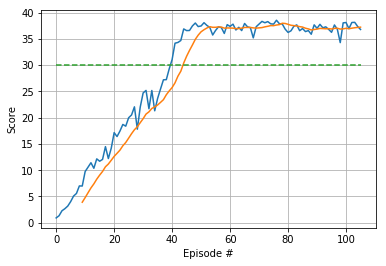

In [13]:
#graph of score over episodes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

target_score=30
rolling_mean = pd.Series(scores_copy).rolling(window=10).mean()

plt.plot(range(len(scores_copy)),scores_copy)
plt.plot(rolling_mean)
plt.plot(range(len(scores_copy)),(len(scores_copy)*[target_score]), linestyle='--')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.grid("on")
plt.show()

In [15]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions=agent.get_action(states)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 34.41999923065305


In [16]:
env.close()